Install libraries

In [13]:
!pip install requests beautifulsoup4 pandas

Import libraries

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

Fetch the website

In [3]:
url = "https://books.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")


Extract book data(multi_page_scraping)

In [18]:
books = []
page = 1

while True:
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)

    if response.status_code != 200:
        break

    soup = BeautifulSoup(response.text, "html.parser")
    all_books = soup.find_all("article", class_="product_pod")

    if len(all_books) == 0:
        break

    for book in all_books:
        title = book.h3.a["title"]

        price = book.find("p", class_="price_color").text
        price = price.replace("£", "").replace("Â", "").strip()

        availability = book.find("p", class_="instock availability").text.strip()
        rating = book.p["class"][1]

        books.append([title, float(price), availability, rating])

    page += 1

df = pd.DataFrame(books, columns=["Title", "Price", "Availability", "Rating"])
df.head()




,Title,Price,Availability,Rating
0,A Light in the Attic,51.77,In stock,Three
1,Tipping the Velvet,53.74,In stock,One
2,Soumission,50.10,In stock,One
3,Sharp Objects,47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five


save to **CSV** file

In [19]:
df.to_csv("books_data.csv", index=False)
print("CSV file saved!")



CSV file saved!


Price comparison

In [20]:
cheapest = df.loc[df["Price"].idxmin()]
expensive = df.loc[df["Price"].idxmax()]

print("Cheapest Book:\n", cheapest)
print("\nMost Expensive Book:\n", expensive)


Cheapest Book:
 Title           An Abundance of Katherines
Price                                 10.0
Availability                      In stock
Rating                                Five
Name: 638, dtype: object

Most Expensive Book:
 Title           The Perfect Play (Play by Play #1)
Price                                        59.99
Availability                              In stock
Rating                                       Three
Name: 648, dtype: object


Rating distribution Graph(shows how many books have each rating)

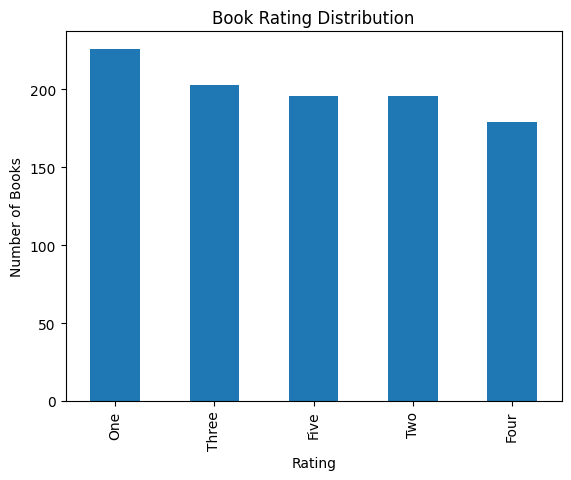

In [21]:
df["Rating"].value_counts().plot(kind="bar")
plt.title("Book Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Books")
plt.show()


Price histogram(shows how prices are spread)

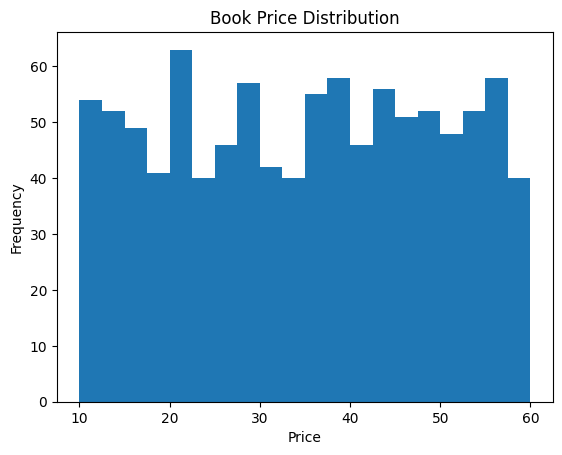

In [22]:
df["Price"].plot(kind="hist", bins=20)
plt.title("Book Price Distribution")
plt.xlabel("Price")
plt.show()


category wise scraping

In [23]:
url = "http://books.toscrape.com/catalogue/category/books/travel_2/index.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

travel_books = []

for book in soup.find_all("article", class_="product_pod"):
    title = book.h3.a["title"]
    price = book.find("p", class_="price_color").text
    price = price.replace("£", "").replace("Â", "").strip()

    travel_books.append([title, float(price)])

travel_df = pd.DataFrame(travel_books, columns=["Title", "Price"])
travel_df


,Title,Price
0,It's Only the Himalayas,45.17
1,Full Moon over Noahâs Ark: An Odyssey to Mou...,49.43
2,See America: A Celebration of Our National Par...,48.87
3,Vagabonding: An Uncommon Guide to the Art of L...,36.94
4,Under the Tuscan Sun,37.33
5,A Summer In Europe,44.34
6,The Great Railway Bazaar,30.54
7,A Year in Provence (Provence #1),56.88
8,The Road to Little Dribbling: Adventures of an...,23.21
9,Neither Here nor There: Travels in Europe,38.95


Data analysis

In [24]:
df.describe()


,Price
count,1000.00000
mean,35.07035
std,14.44669
min,10.00000
25%,22.10750
50%,35.98000
75%,47.45750
max,59.99000
